In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import chi2_contingency, pearsonr, spearmanr

In [49]:
IQ_df = pd.read_csv('./work/data_analyysi_oppimistehtävä/datasets/IQ_level.csv')

In [50]:
IQ_df.sample(10)

,rank,country,IQ,education_expenditure,avg_income,avg_temp
44,45,Vietnam,91,76.0,1446.0,28.9
83,84,India,77,47.0,1163.0,31.7
53,54,Iraq,88,193.0,3757.0,32.3
12,13,Germany,100,1883.0,39911.0,13.8
77,78,Oman,80,798.0,15328.0,33.8
26,27,Cambodia,97,16.0,776.0,33.1
88,89,Chad,75,16.0,630.0,35.6
63,64,Brazil,83,427.0,7586.0,30.6
71,72,Puerto Rico,82,1174.0,16583.0,30.4
73,74,Iran,81,176.0,4545.0,26.6


In [51]:
IQ_df.describe()

,rank,IQ,education_expenditure,avg_income,avg_temp
count,108.00000,108.000000,103.000000,106.000000,108.000000
mean,54.50000,85.972222,903.058252,17174.650943,23.858333
std,31.32092,12.998532,1166.625835,20871.092773,8.392232
min,1.00000,51.000000,1.000000,316.000000,0.400000
25%,27.75000,78.750000,81.500000,2263.250000,17.250000
50%,54.50000,88.000000,336.000000,7533.000000,25.850000
75%,81.25000,97.000000,1360.000000,30040.000000,31.275000
max,108.00000,106.000000,5436.000000,108349.000000,36.500000


## Data cleanup

In [52]:
IQ_df.isnull().sum()

rank                     0
country                  0
IQ                       0
education_expenditure    5
avg_income               2
avg_temp                 0
dtype: int64

In [53]:
IQ_df = IQ_df.dropna() # drop rows with missing values

## Distribution of IQ

<Axes: xlabel='IQ', ylabel='Count'>

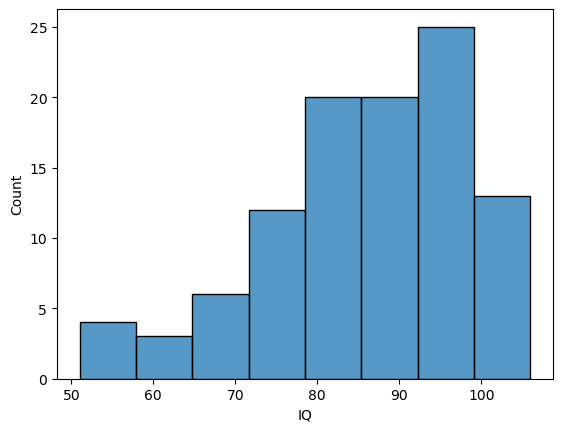

In [54]:
sb.histplot(IQ_df['IQ'])

## Top 10 countries by IQ

In [55]:
IQ_df.sort_values(by=['rank'], inplace=True)
IQ_df[['rank', 'country', 'IQ']].head(10)

,rank,country,IQ
0,1,Hong Kong,106
1,2,Japan,106
2,3,Singapore,106
4,5,China,104
5,6,South Korea,103
6,7,Netherlands,101
7,8,Finland,101
8,9,Canada,100
10,11,Luxembourg,100
11,12,Macao,100


<Axes: >

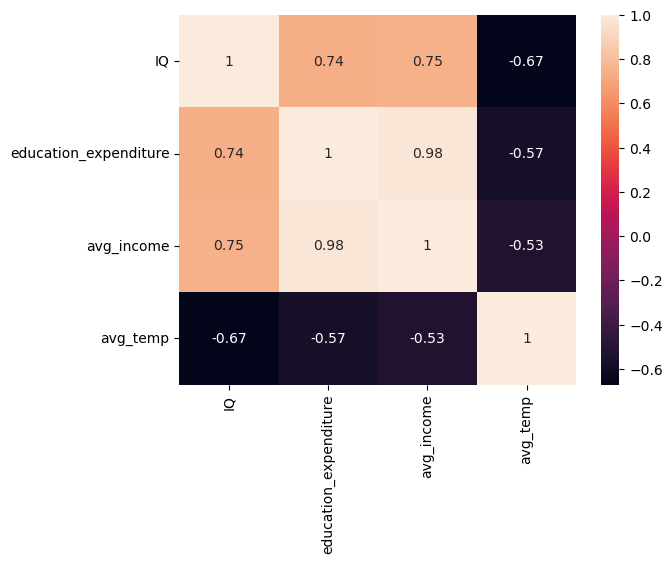

In [70]:
corr = IQ_df[['IQ', 'education_expenditure', 'avg_income', 'avg_temp']].corr(method='spearman')
sb.heatmap(corr, annot=True)

## Correlation between education expenditure and IQ

<Axes: xlabel='education_expenditure', ylabel='IQ'>

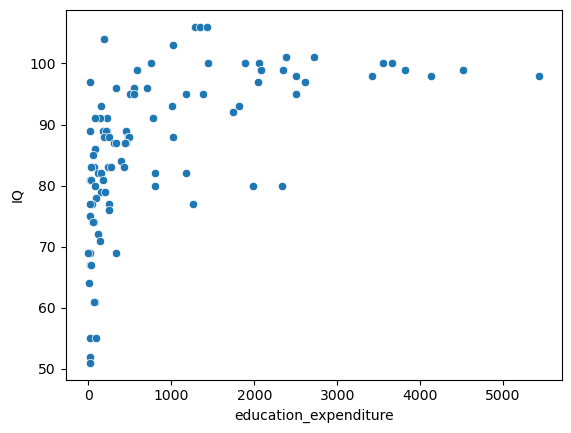

In [66]:
sb.scatterplot(data=IQ_df, y='IQ', x='education_expenditure')

In [59]:
spearmanr(IQ_df['IQ'], IQ_df['education_expenditure'])

SignificanceResult(statistic=0.7359777619210293, pvalue=8.282596015240253e-19)

## Correlation between income and IQ

<Axes: xlabel='avg_income', ylabel='IQ'>

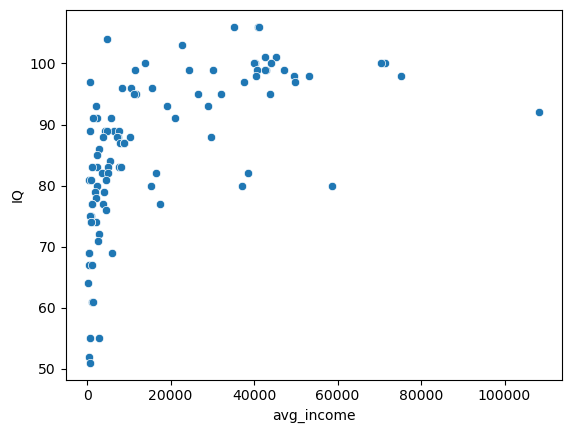

In [60]:
sb.scatterplot(data=IQ_df, y='IQ', x='avg_income')

In [69]:
spearmanr(IQ_df['IQ'], IQ_df['avg_income'])

SignificanceResult(statistic=0.7473974553911907, pvalue=1.2183358739655305e-19)
SignificanceResult(statistic=0.7473974553911907, pvalue=1.2183358739655305e-19)


## Correlation between average temperature and IQ

<Axes: xlabel='avg_temp', ylabel='IQ'>

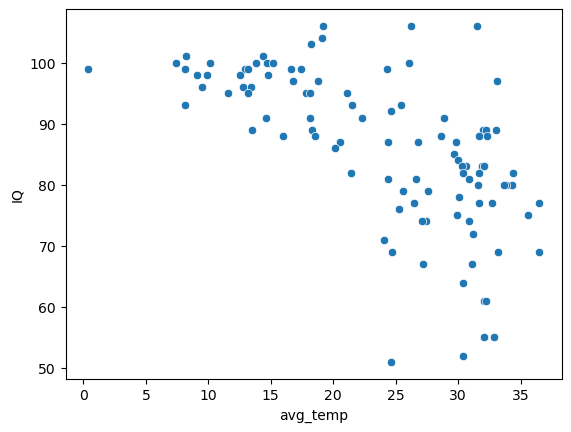

In [63]:
sb.scatterplot(data=IQ_df, y='IQ', x='avg_temp')

In [72]:
spearmanr(IQ_df['IQ'], IQ_df['avg_temp'])

SignificanceResult(statistic=-0.67176870748263, pvalue=8.016497315042137e-15)